# Decision Tree for Loan Approval

## Objective
Build a decision tree to determine loan approval based on financial history.
## Steps
1. Load dataset.
2. Understand Information.
3. Data Preprocessing.
4. Create Decision Tree Model.
5. Visualize the Decision Tree
6. Discussionn

## Setup Environment

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Load Dataset

We begin by loading the dataset related to credit scoring..

In [14]:
csv_file = 'cs-training.csv'

data = pd.read_csv(csv_file)
data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### Clean The Columns

In [15]:
data.columns = ['ID', 'Serious Dlq in 2yrs', 'Revolving Utilization Of Unsecured Lines', 'Age', 
                'Number Of Time 30-59 Days Past Due Not Worse', 'Debt Ratio', 'Monthly Income', 
                'Number Of Open Credit Lines And Loans', 'Number Of Times 90 Days Late','Number Real Estate Loans Or Lines', 
                'Number Of Time 60-89 Days Past Due Not Worse', 'Number Of Dependents']
data.head()

,ID,Serious Dlq in 2yrs,Revolving Utilization Of Unsecured Lines,Age,Number Of Time 30-59 Days Past Due Not Worse,Debt Ratio,Monthly Income,Number Of Open Credit Lines And Loans,Number Of Times 90 Days Late,Number Real Estate Loans Or Lines,Number Of Time 60-89 Days Past Due Not Worse,Number Of Dependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## 2. Understand Information

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   ID                                            150000 non-null  int64  
 1   Serious Dlq in 2yrs                           150000 non-null  int64  
 2   Revolving Utilization Of Unsecured Lines      150000 non-null  float64
 3   Age                                           150000 non-null  int64  
 4   Number Of Time 30-59 Days Past Due Not Worse  150000 non-null  int64  
 5   Debt Ratio                                    150000 non-null  float64
 6   Monthly Income                                120269 non-null  float64
 7   Number Of Open Credit Lines And Loans         150000 non-null  int64  
 8   Number Of Times 90 Days Late                  150000 non-null  int64  
 9   Number Real Estate Loans Or Lines             15

### Drop Unnecessary Columns 

In [19]:
data.drop('ID', axis=1, inplace=True)
data.head()

,Serious Dlq in 2yrs,Revolving Utilization Of Unsecured Lines,Age,Number Of Time 30-59 Days Past Due Not Worse,Debt Ratio,Monthly Income,Number Of Open Credit Lines And Loans,Number Of Times 90 Days Late,Number Real Estate Loans Or Lines,Number Of Time 60-89 Days Past Due Not Worse,Number Of Dependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## 3. Data Preprocessing

We will handle any missing values, encode categorical variables, and normalize numerical features.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

num_col = data.select_dtypes(include=['float64', 'int64']).columns
data[num_col] = data[num_col].fillna(data[num_col].mean())

X = data.drop('Serious Dlq in 2yrs', axis = 1)
y = data['Serious Dlq in 2yrs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 4. Create Decision Tree Model
We will use a decision tree to predict loan approval.s.

In [21]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree

DecisionTreeClassifier()

### Prediction

In [22]:
pred = tree.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Accuracy

In [23]:
accuracy = metrics.accuracy_score(y_test, pred)
print(f'Accuracy Score: {accuracy}')

Accuracy Score: 0.8984


## 5. Visualize the Decision Tree

We will visualize the decision tree to interpret the decision-making process.r.

Accuracy with max_depth = 3: 0.9365


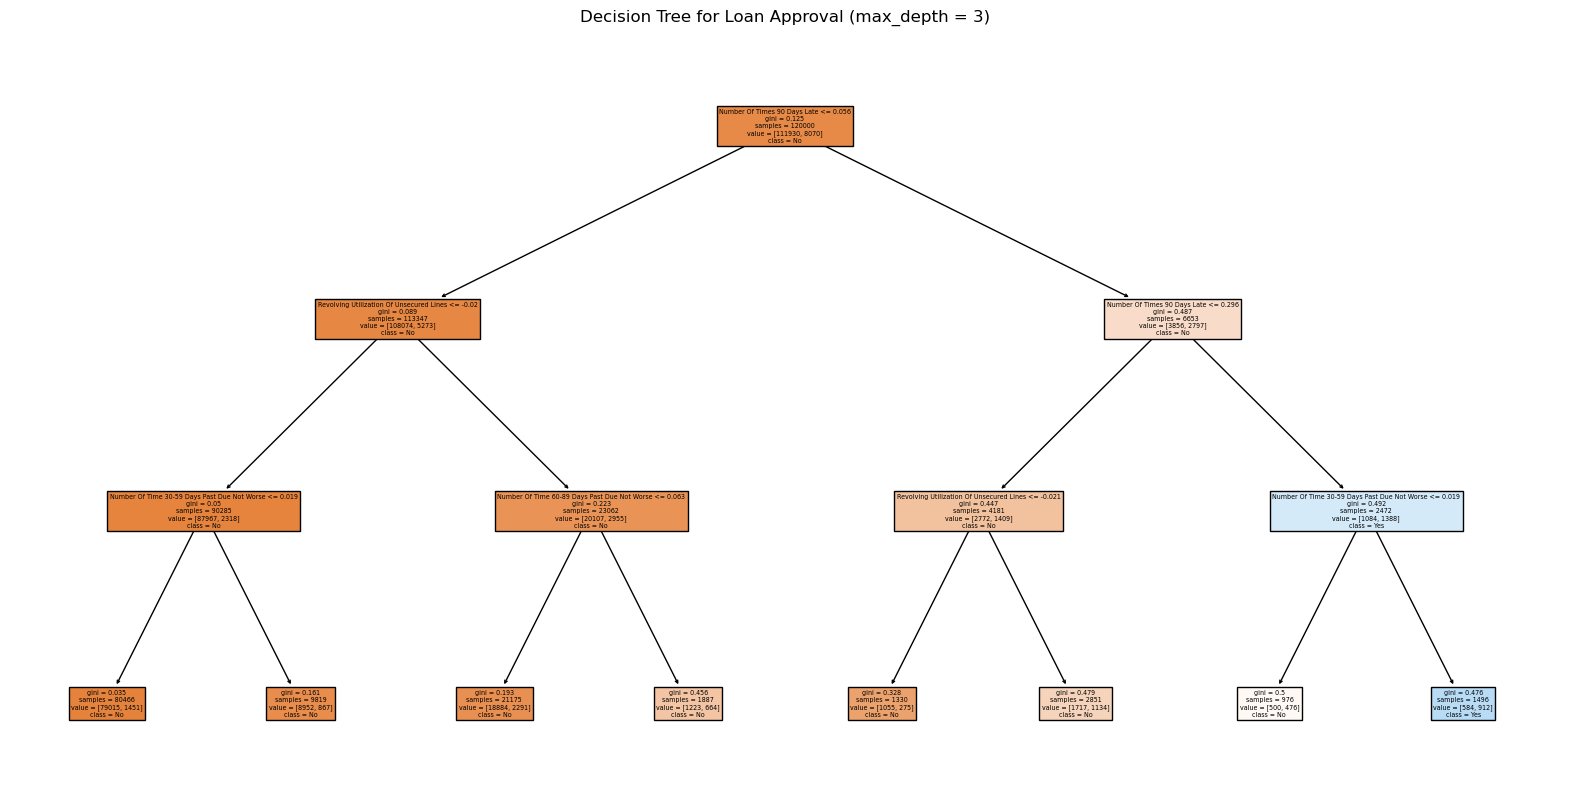

Accuracy with max_depth = 5: 0.9368


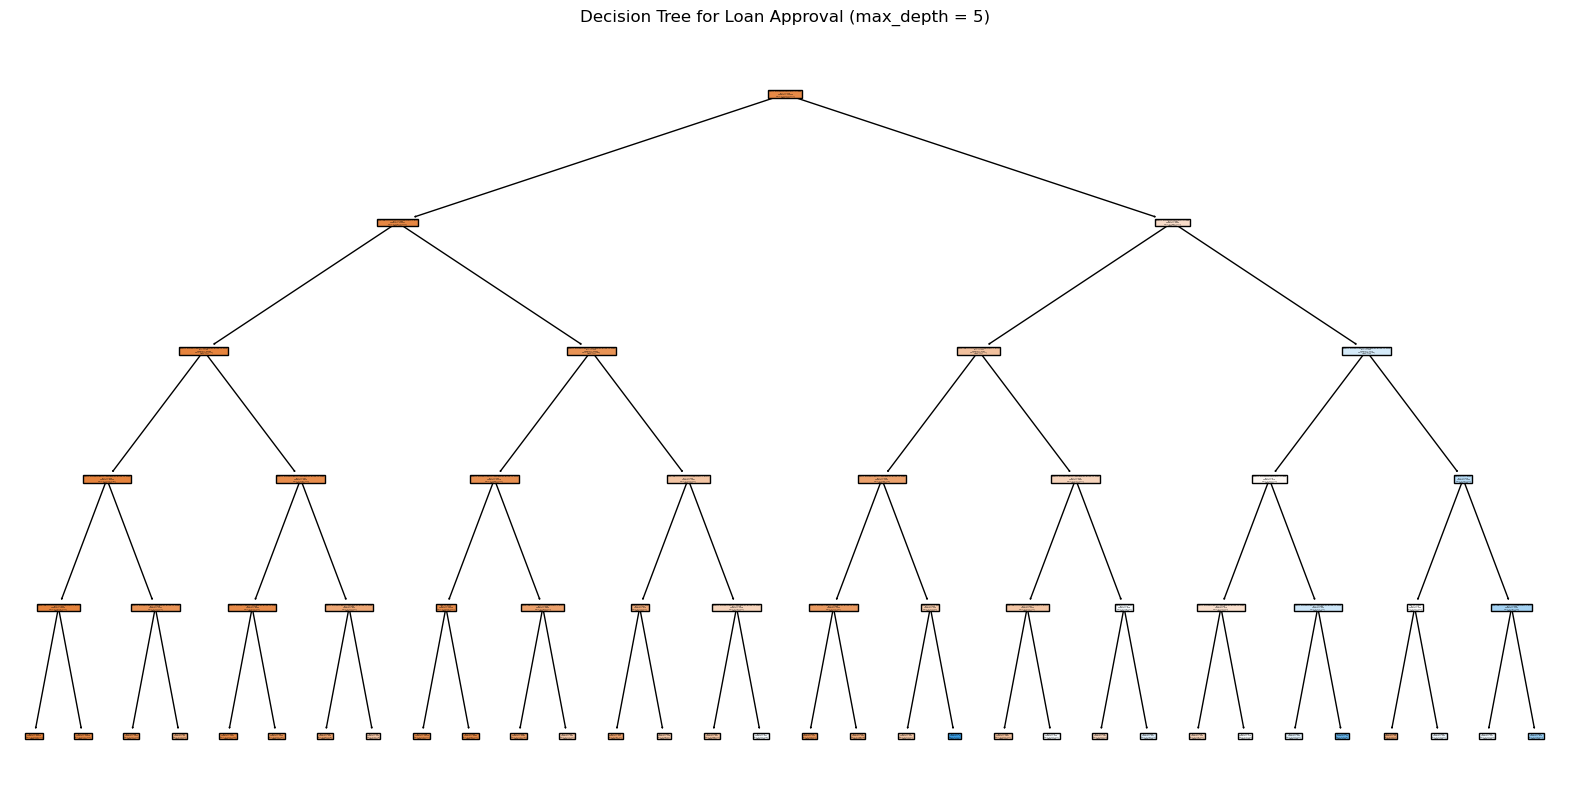

Accuracy with max_depth = 7: 0.9366


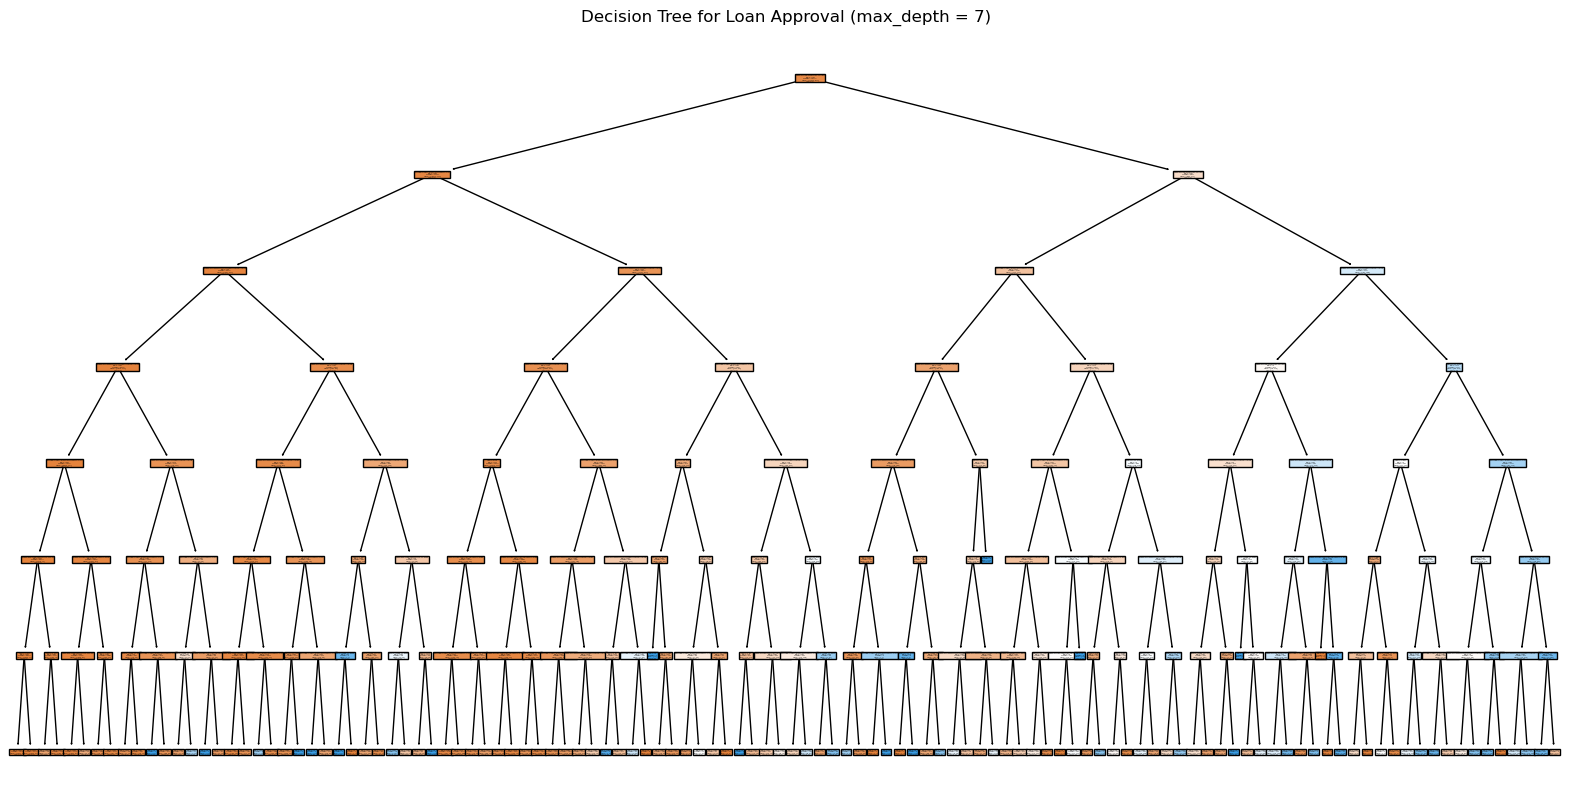

Accuracy with max_depth = 10: 0.9342


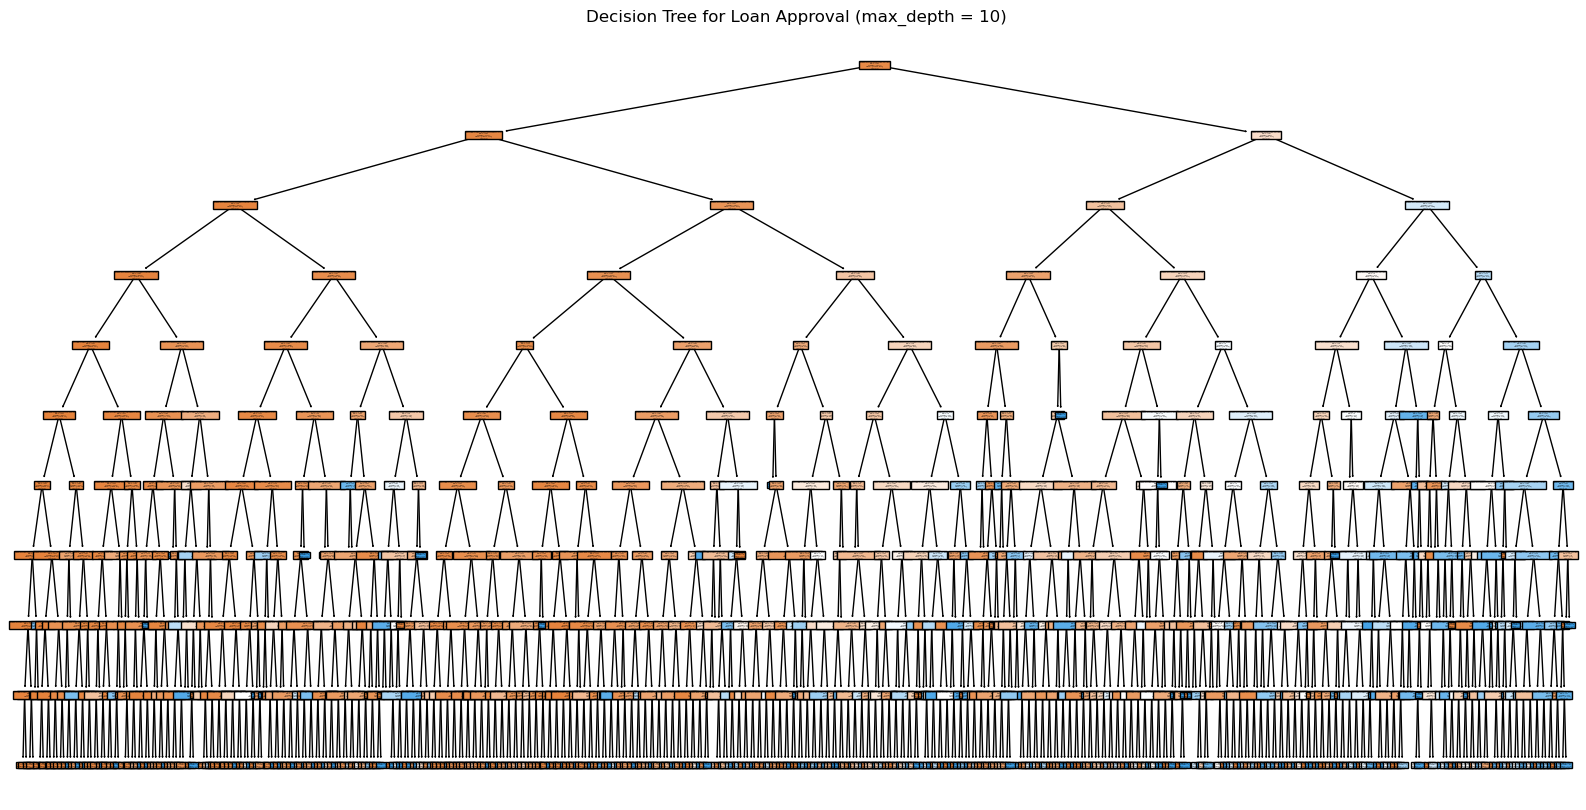

Accuracy with max_depth = 15: 0.9253


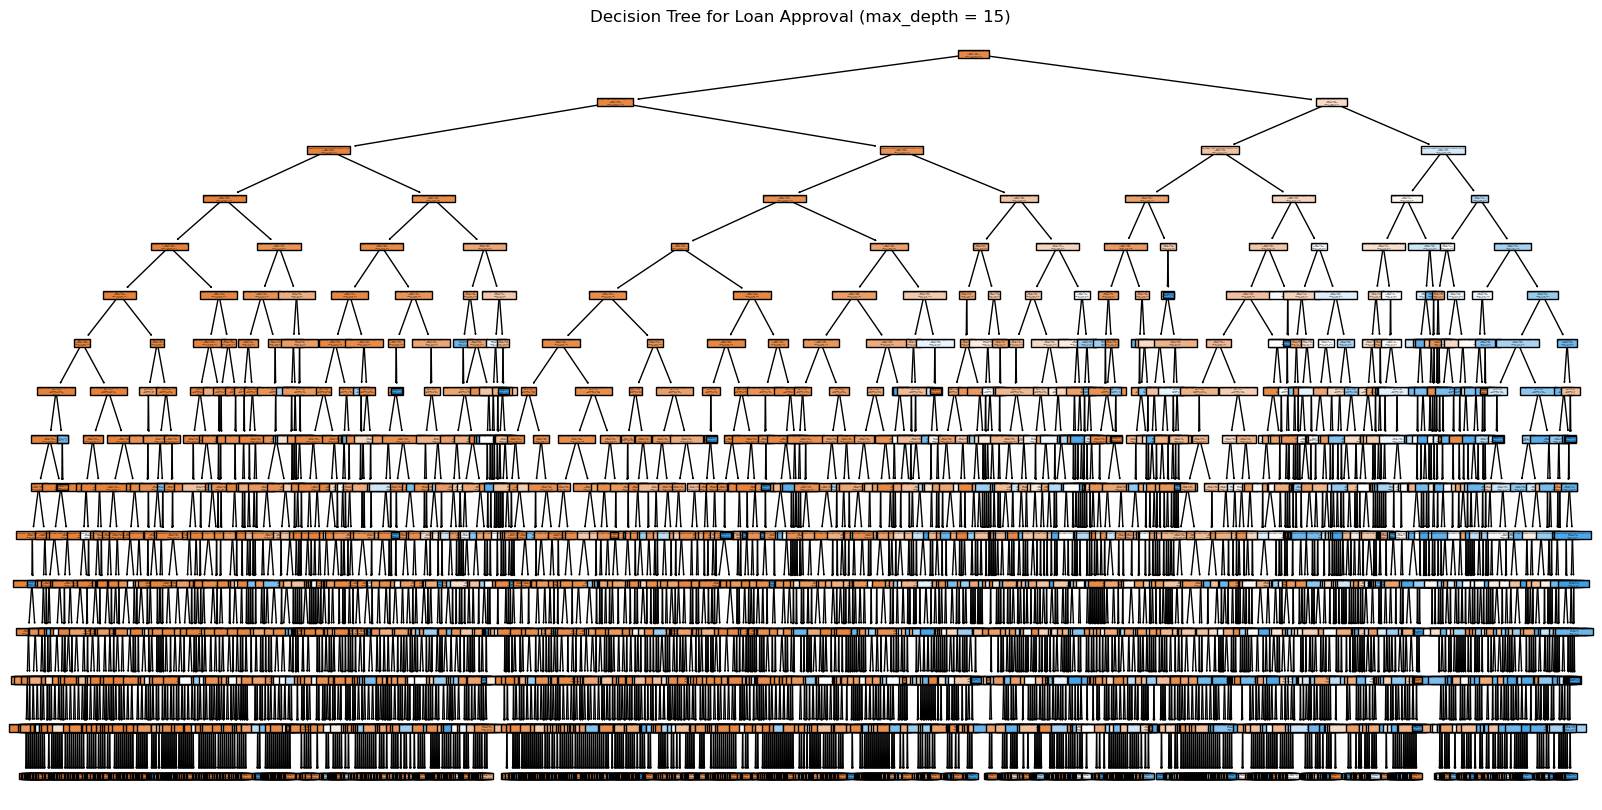

Accuracy with max_depth = 20: 0.915


In [ ]:
from sklearn.tree import plot_tree

for depth in [3, 5, 7, 10, 15, 20]:
    tree = DecisionTreeClassifier(random_state=42, max_depth=depth)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(f'Accuracy with max_depth = {depth}: {accuracy}')
    
    plt.figure(figsize = (20, 10))
    plot_tree(tree, filled = True, feature_names = X.columns, class_names = ['No', 'Yes'])
    plt.title(f'Decision Tree for Loan Approval (max_depth = {depth})')
    plt.show()

## 5. Discussion

We analyze the model's accuracy and discuss potential improvements and biases.

### Model Accuracy

- The accuracy score shows the proportion of correct predictions.

### Decision-Making Process

- The decision tree visualization helps in understanding the criteria used for loan approval.

### Potential Improvements

- Use more advanced classification techniques (e.g., Random Forest).
- Perform hyperparameter tuning to optimize the model.

### Potential Biases

- The dataset may not be representative of all loan applicants.
- The model may overfit or underfit if not properly validated.perly validated.ted. validated.